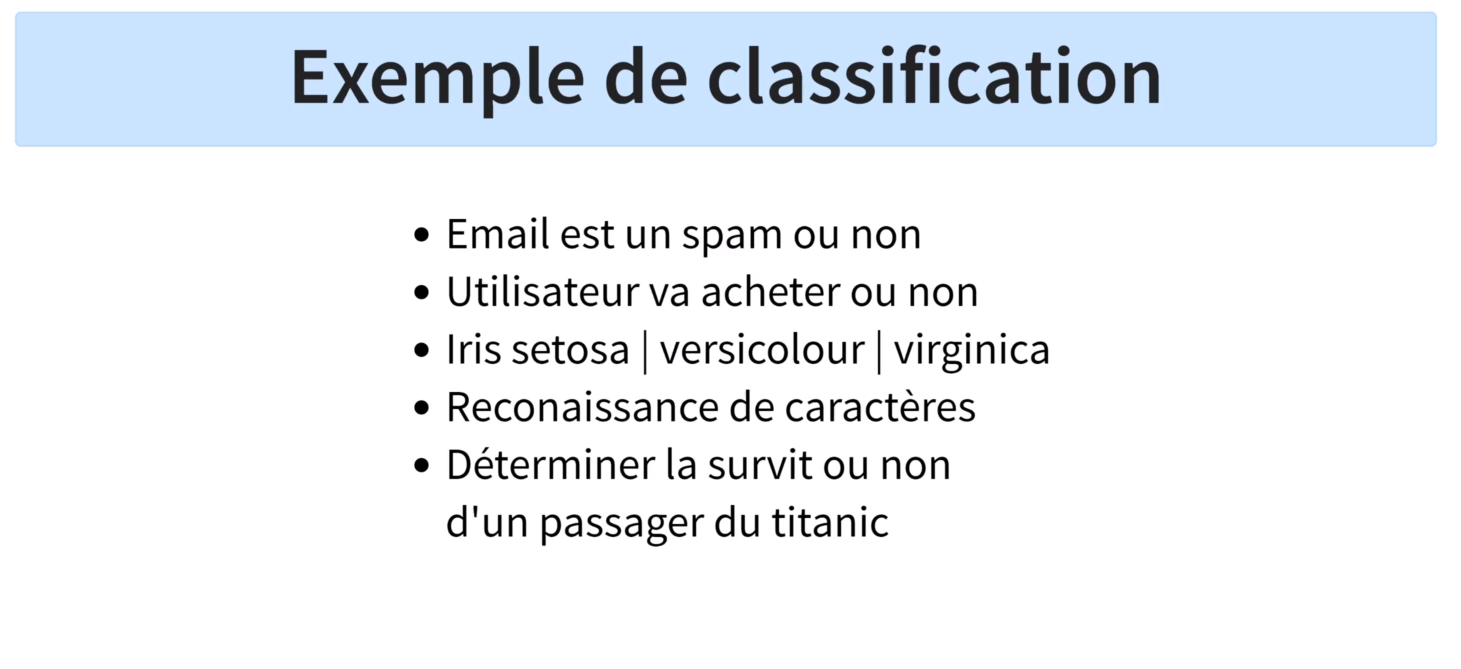

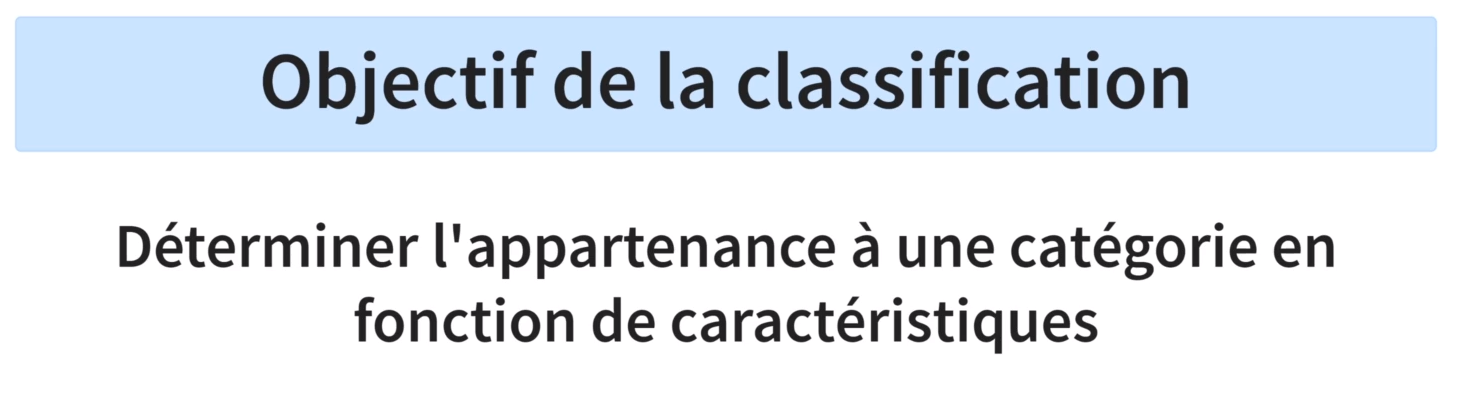

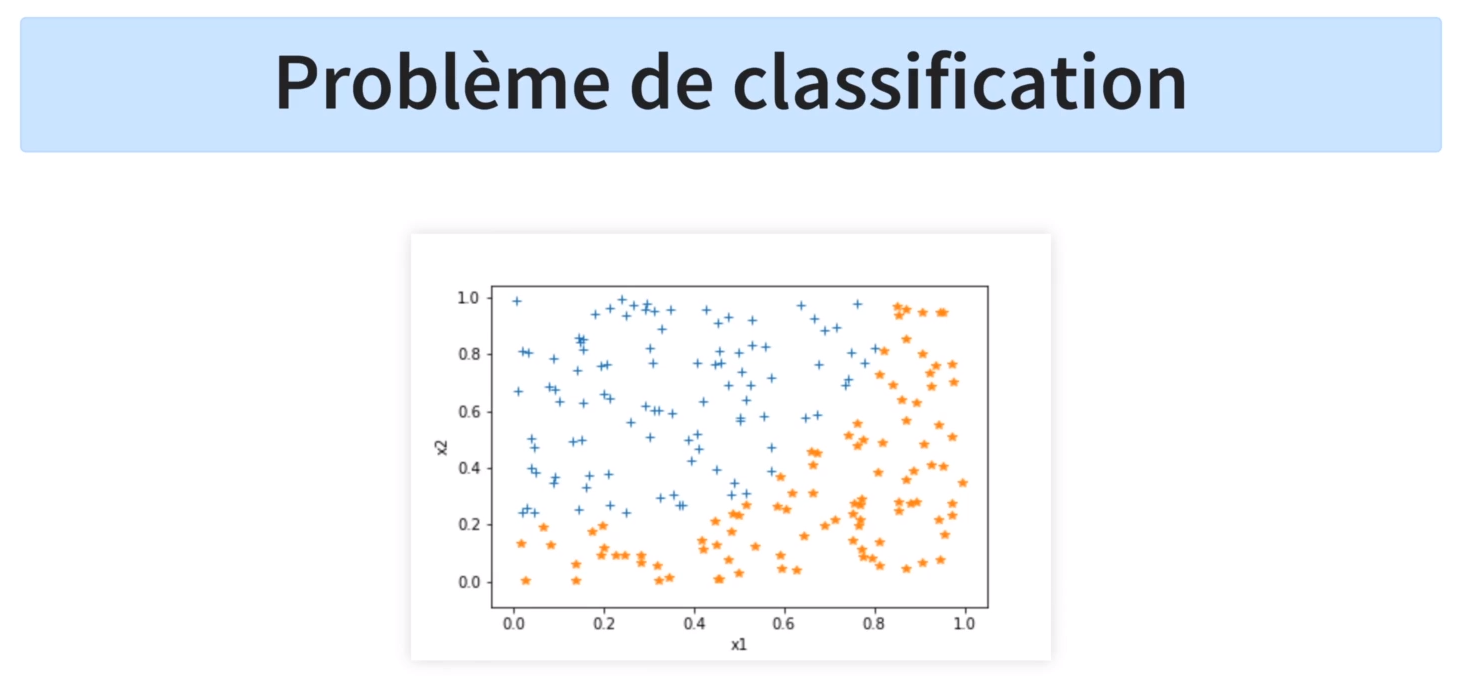

# Régression logistique vs régression linéaire

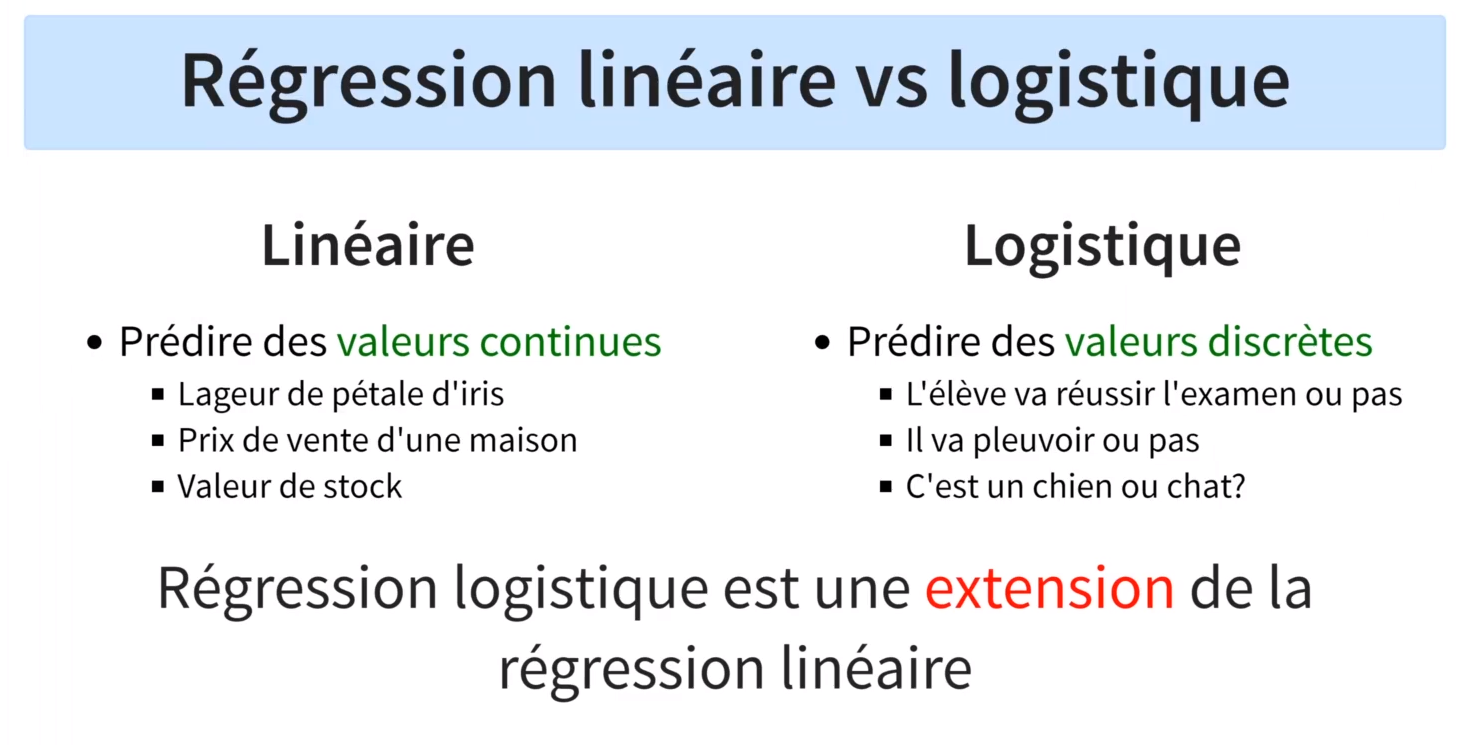

# Rappel sur les probabilités

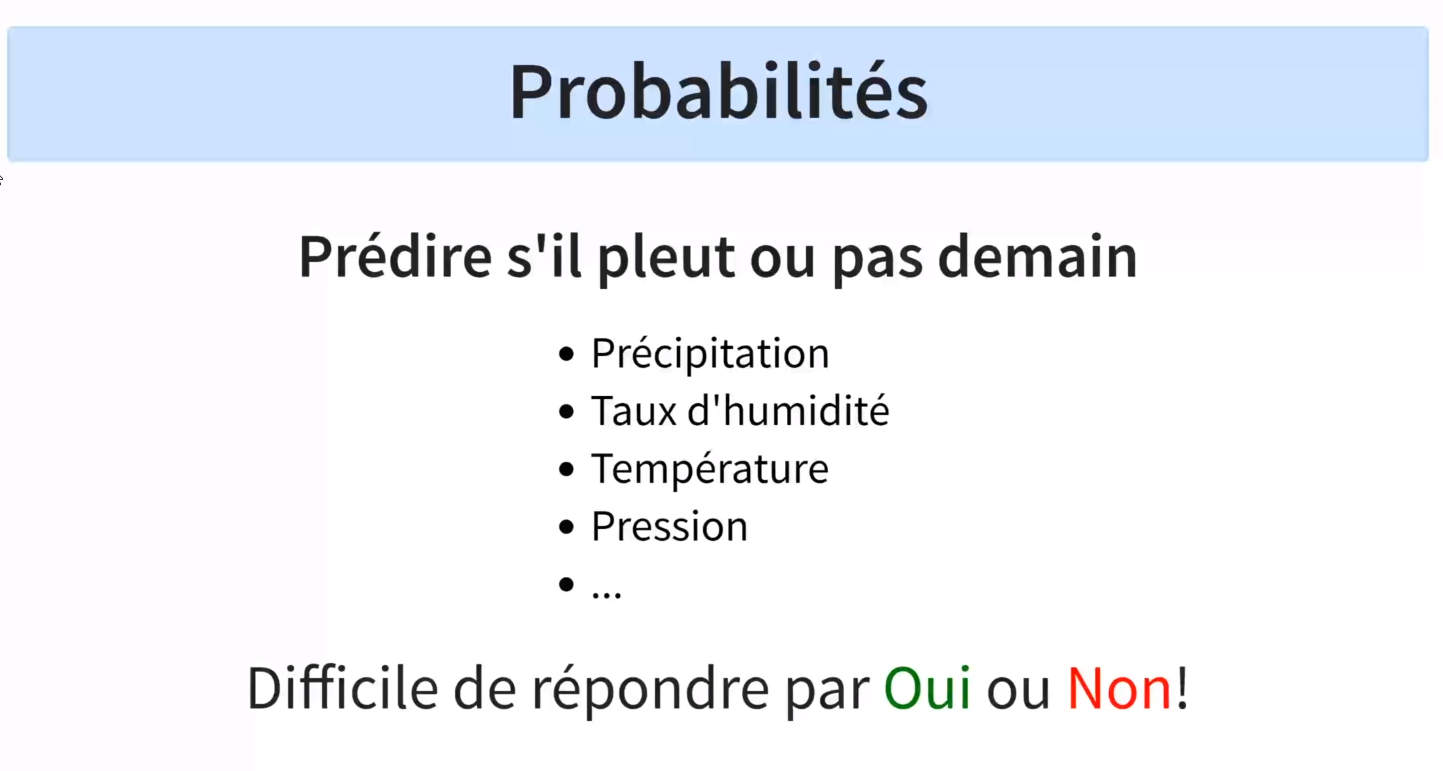

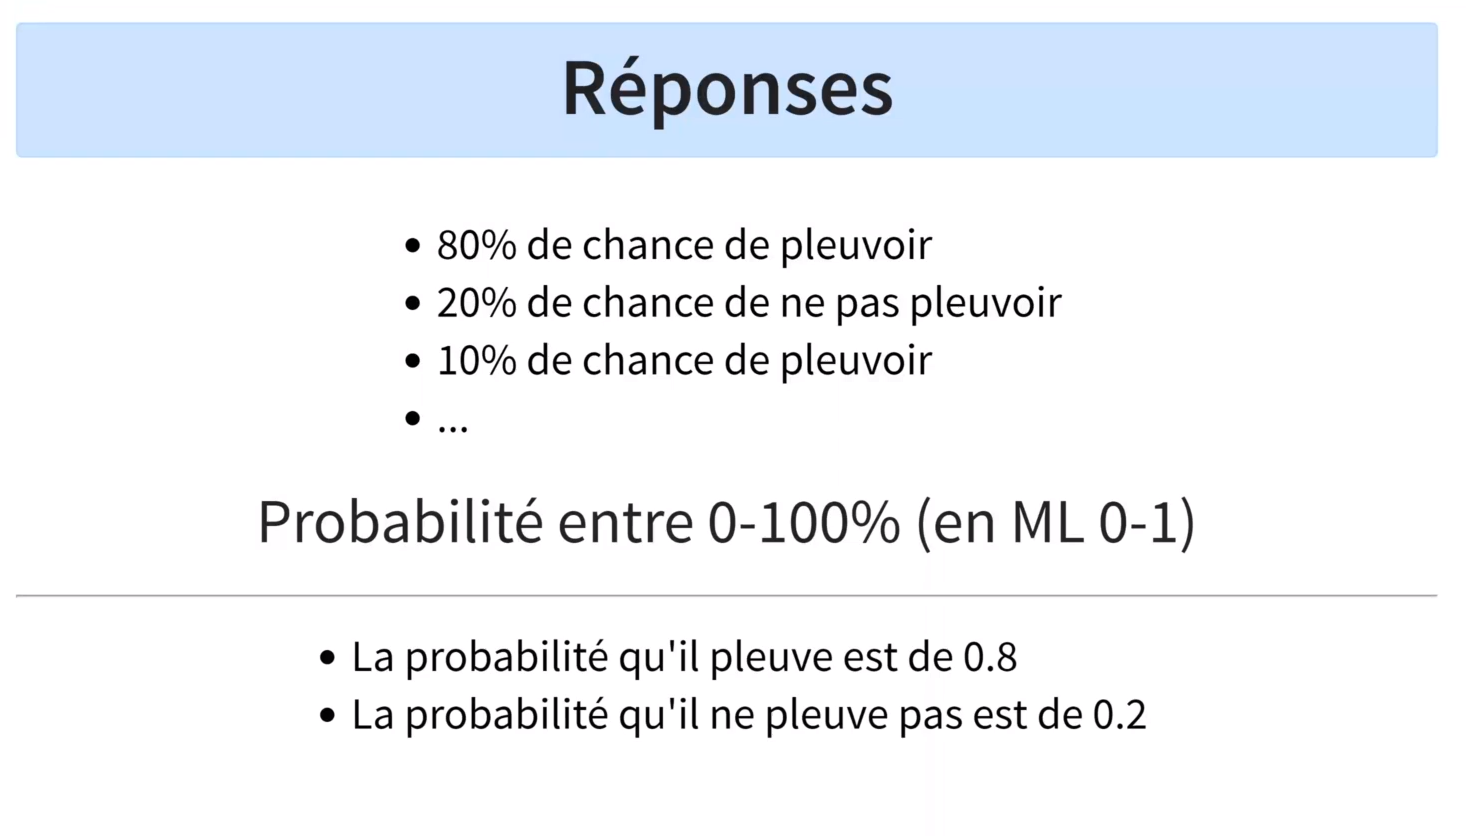

# La fonction logistique (sigmoïde)

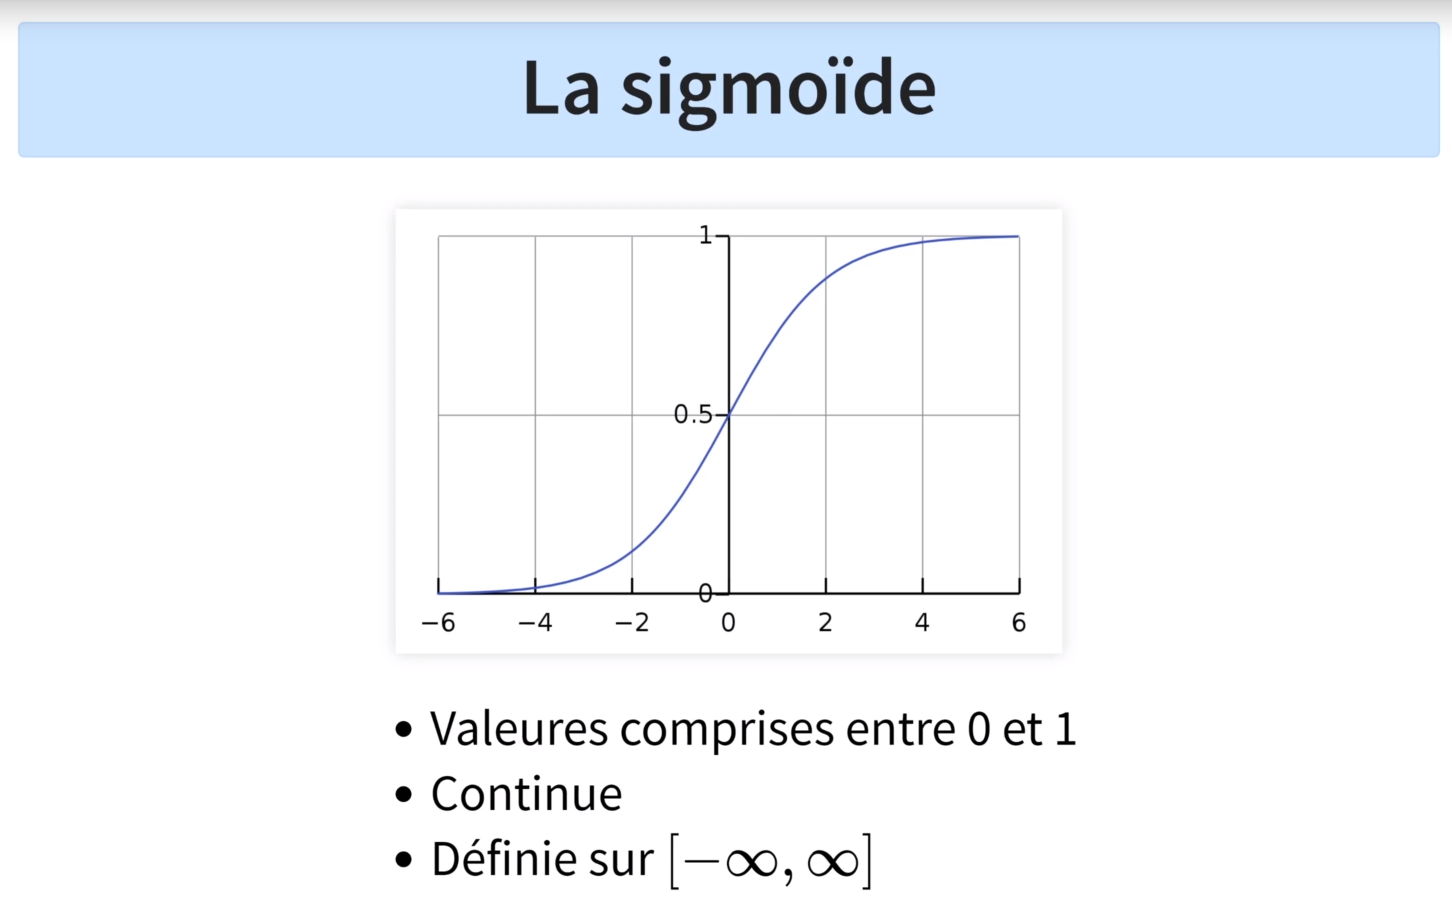

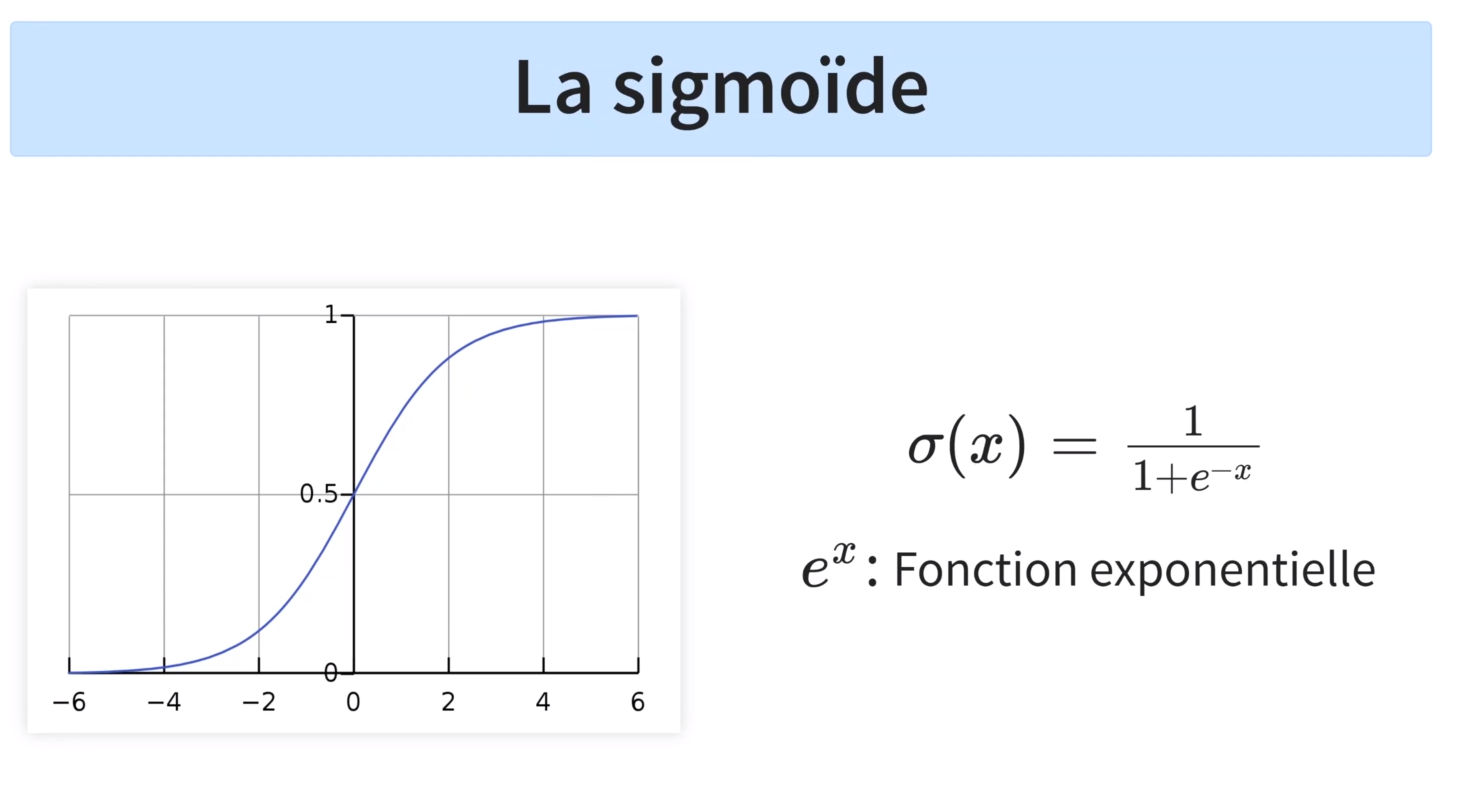

# Implémentation: sigmoïde

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

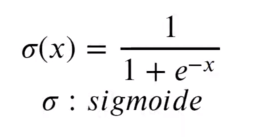

In [2]:
def sigmoide(x):
    s = 1/(1 + np.exp(-x))
    return s

In [3]:
s = sigmoide(0)
s

0.5

In [4]:
x = np.linspace(-10, 10, 100)
y = sigmoide(x)
y

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

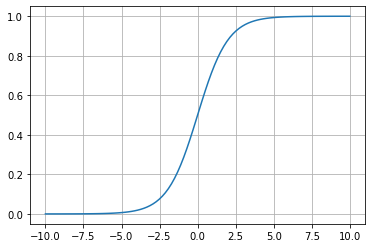

In [5]:
plt.plot(x, y)
plt.grid()
plt.show()

# Modèle prédictif

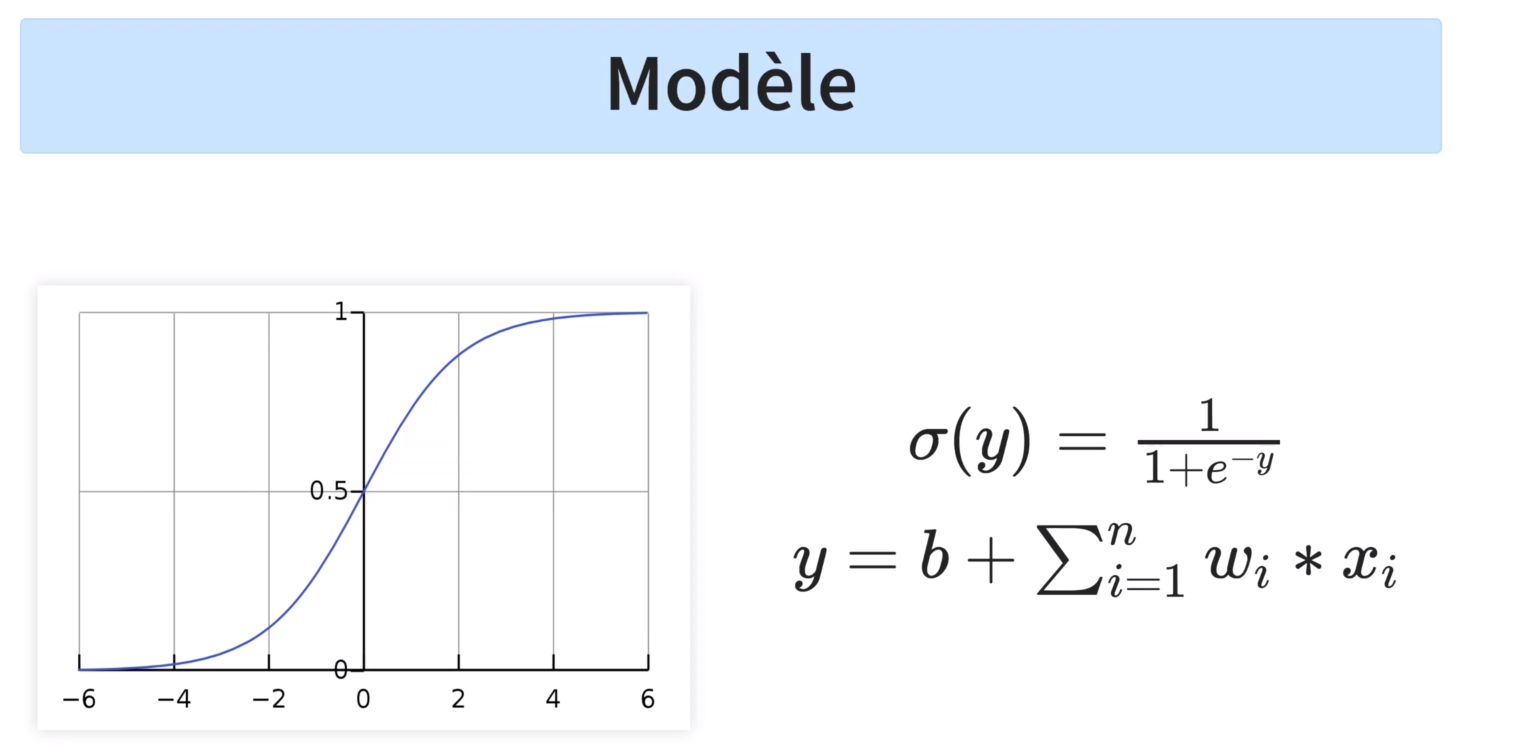

# Implémentation: modèle prédictif

In [6]:
def regression_lin(b, w, x):
    y = 0
    for wi, xi in zip(w, x):
        y += wi*xi
    y += b
    return y

In [7]:
b = 1
w = [1, 2]
x = [2, 4]

y = regression_lin(b, w, x)
y

11

In [8]:
def regression_log(b, w, x):
    y = regression_lin(b, w, x)
    s = sigmoide(y)
    return s

In [9]:
b = 1
w = [1, 1, 1]
x = [1, -10, 0]
l = regression_log(b, w, x)
l

0.0003353501304664781

# Présentation du dataset

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv("classification.csv")
    # On importe le data

In [12]:
dataset.head()

,x1,x2,label
0,0.448196,0.130705,0.0
1,0.773273,0.086142,0.0
2,0.418814,0.634072,1.0
3,0.951985,0.403000,0.0
4,0.628209,0.040618,0.0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   label   200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


<AxesSubplot:xlabel='x1', ylabel='x2'>

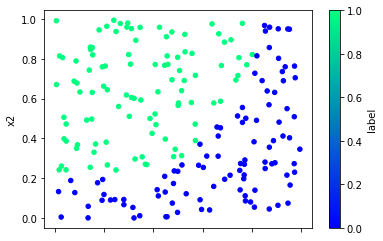

In [14]:
dataset.plot.scatter(x="x1", y="x2", c="label", colormap="winter")
    #x1 en fonct de x2

# Implémentation: scikit-learn

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
X = dataset[["x1","x2"]].values
y = dataset[["label"]].values

In [18]:
print(y[:5])
    # On doit le convertir en liste

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [19]:
y = y.ravel()
print(y[:5]) # Liste

[0. 0. 1. 0. 0.]


In [21]:
log = LogisticRegression()
log.fit(X,y)

LogisticRegression()

In [22]:
y_pred = log.predict(X)

In [23]:
y_pred

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.])

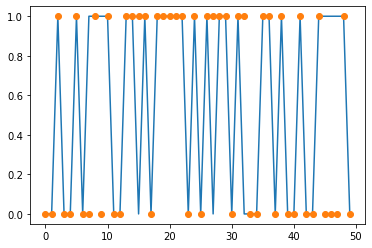

In [27]:
n=50
plt.plot(y[:n])
plt.plot(y_pred[:n], "o")
plt.show()

In [28]:
print(log.coef_, log.intercept_)

[[-4.10749984  3.97795939]] [0.15829959]


In [29]:
s = log.score(X, y)
s
# Le modele est juste a 86%

0.865

# Limite de décision

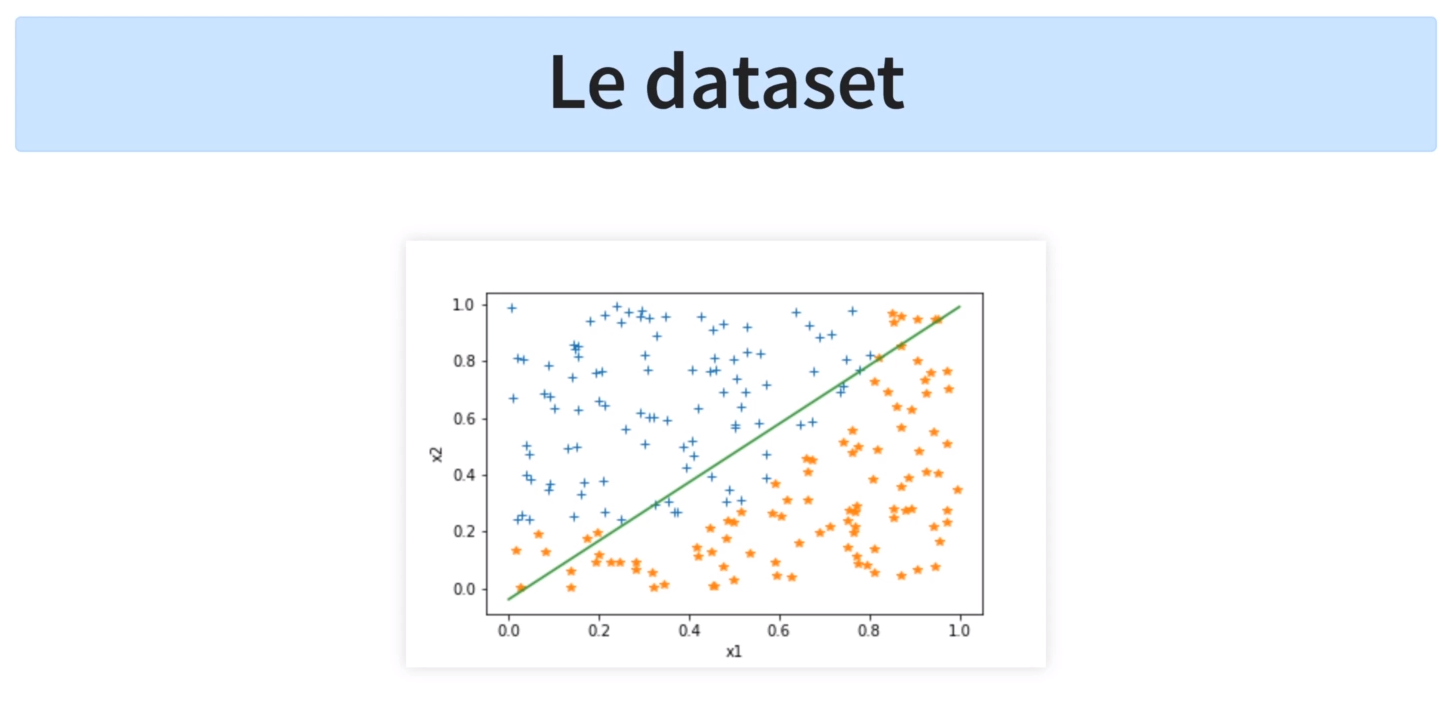

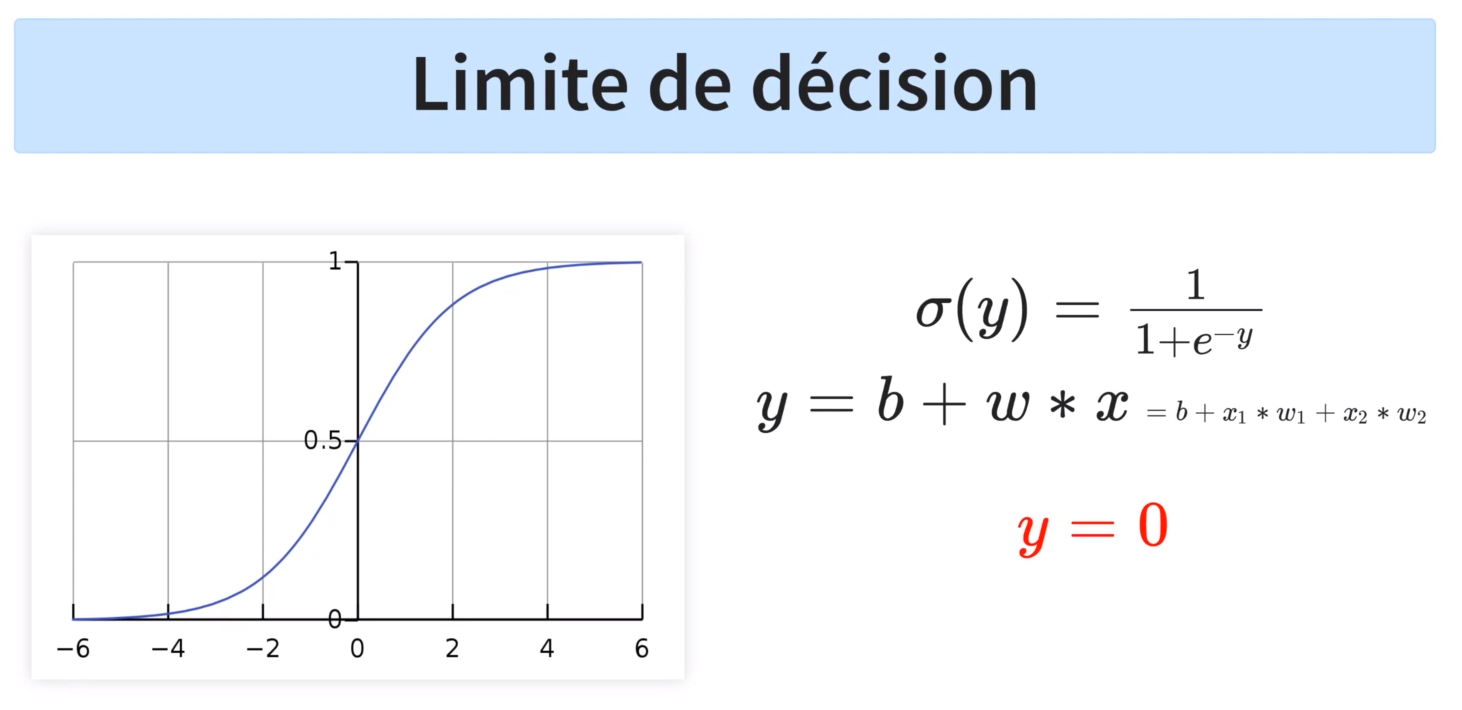

# Implémentation: limite de décision

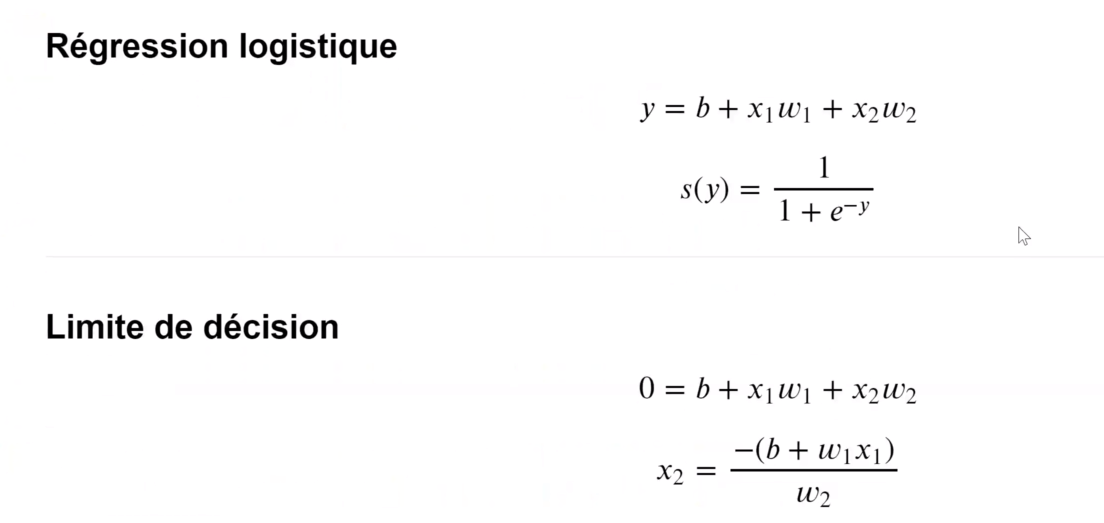

In [30]:
b = log.intercept_[0]
w1 = log.coef_[0, 0]
w2 = log.coef_[0, 1]

x1 = X[:, 0]
x2 = -(b+w1*x1)/w2
x2[:10]

array([0.4229972 , 0.7586601 , 0.39265858, 0.94319169, 0.60887228,
       0.21717081, 0.75325401, 0.45831918, 0.73146906, 0.34595622])

In [31]:
x_pos = np.array([[x[0], x[1]] for x in dataset.values if x[2] >= 0.5]) 
x_neg = np.array([[x[0], x[1]] for x in dataset.values if x[2] <= 0.5])

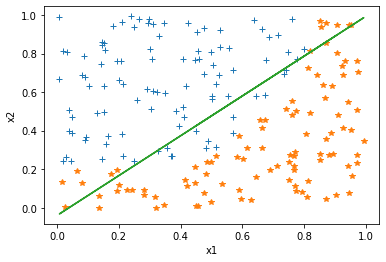

In [32]:
plt.plot(x_pos[:, 0], x_pos[:, 1], '+')
plt.plot(x_neg[:, 0], x_neg[:, 1], '*')
plt.plot(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

[1.]


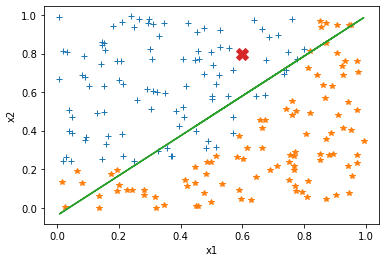

In [33]:
x_test = [0.6, 0.8]
y_pred = log.predict([[x_test[0], x_test[1]]])
print(y_pred)

plt.plot(x_pos[:, 0], x_pos[:, 1], '+')
plt.plot(x_neg[:, 0], x_neg[:, 1], '*')
plt.plot(x1, x2)
plt.plot(x_test[0], x_test[1], 'X', markersize=12)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()